# Visualization

---

In [6]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import* 
from shapely import wkt
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd
import folium

In [7]:
spark = (
    SparkSession.builder.appName("Visualisation")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.driver.memory","4G")
    .config("spark.executor.memory","4G")
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .getOrCreate()
)

# Read datasets

In [9]:
# read datasets
merged_external_df = pd.read_csv('../data/curated/merged_external.csv')

In [34]:
# check the data type
print('merged_external_df:')
print(merged_external_df.dtypes)

merged_external_df:
SA2_name                          object
average_population               float64
Median_age_persons                 int64
Median_mortgage_repay_monthly      int64
Median_tot_prsnl_inc_weekly        int64
Median_rent_weekly                 int64
Median_tot_fam_inc_weekly          int64
Average_num_psns_per_bedroom     float64
Median_tot_hhd_inc_weekly          int64
Average_household_size           float64
geometry                          object
postcode                           int64
state                             object
unemployment_rate                float64
dtype: object


In [12]:
# convert the 'geometry' column from WKT strings to Shapely geometries
merged_external_df['geometry'] = merged_external_df['geometry'].apply(wkt.loads)

# create a GeoDataFrame
merged_external_gdf = gpd.GeoDataFrame(merged_external_df, geometry='geometry')

# set the original CRS (assuming Web Mercator for example)
merged_external_gdf.set_crs(epsg=4326, inplace=True)
merged_external_gdf.dtypes

SA2_name                           object
average_population                float64
Median_age_persons                  int64
Median_mortgage_repay_monthly       int64
Median_tot_prsnl_inc_weekly         int64
Median_rent_weekly                  int64
Median_tot_fam_inc_weekly           int64
Average_num_psns_per_bedroom      float64
Median_tot_hhd_inc_weekly           int64
Average_household_size            float64
geometry                         geometry
postcode                            int64
state                              object
unemployment_rate                 float64
dtype: object

In [36]:
merged_external_gdf.shape

(4969, 14)

In [37]:
merged_external_gdf.head()

,SA2_name,average_population,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,geometry,postcode,state,unemployment_rate
0,Braidwood,4349.0,51,1732,760,330,1886,0.8,1429,2.2,"POLYGON ((149.58424 -35.44426, 149.58444 -35.4...",2580,NSW,3.5
1,Braidwood,4349.0,51,1732,760,330,1886,0.8,1429,2.2,"POLYGON ((149.58424 -35.44426, 149.58444 -35.4...",2622,NSW,3.5
2,Karabar,8538.0,38,1950,975,350,2334,0.8,1989,2.6,"POLYGON ((149.21899 -35.36738, 149.218 -35.366...",2620,NSW,4.3
3,Queanbeyan,11382.5,37,1700,996,330,2233,0.9,1703,2.1,"POLYGON ((149.21326 -35.34325, 149.21619 -35.3...",2620,ACT,4.2
4,Queanbeyan,11382.5,37,1700,996,330,2233,0.9,1703,2.1,"POLYGON ((149.21326 -35.34325, 149.21619 -35.3...",2620,ACT,3.1


# Histograms

### Population distribution by SA2

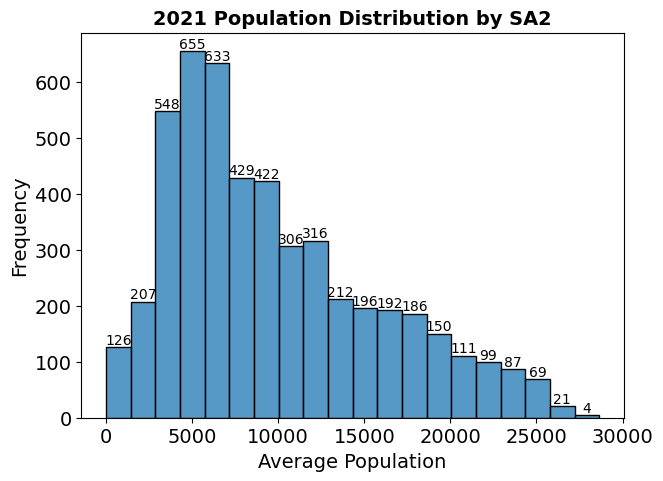

In [5]:
population_data = merged_external_df['average_population']

# create the plot
plt.figure(figsize=(7, 5))
ax = sns.histplot(population_data, bins=20, kde=False)

plt.title('2021 Population Distribution by SA2', weight='bold', fontsize=14)
plt.xlabel('Average Population', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# add labels to each bar
for patch in ax.patches:
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# save and display the plot
plt.savefig('../plots/population_hist.png', dpi=300, bbox_inches='tight')
plt.show()

### Age distribution by SA2

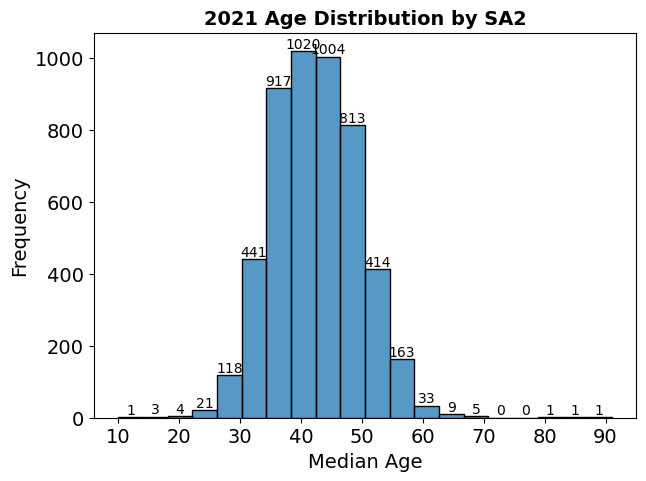

In [10]:
age_data = merged_external_df['Median_age_persons']

# create the plot
plt.figure(figsize=(7, 5))
ax = sns.histplot(age_data, bins=20, kde=False)

plt.title('2021 Age Distribution by SA2', weight='bold', fontsize=14)
plt.xlabel('Median Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# add labels to each bar
for patch in ax.patches:
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# save and display the plot
plt.savefig('../plots/age_hist.png', dpi=300, bbox_inches='tight')
plt.show()

### Monthly mortgage repayment distribution by SA2

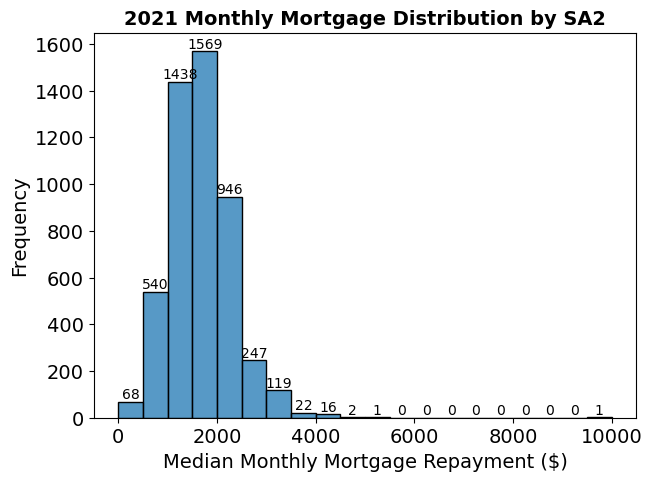

In [12]:
mortgage_data = merged_external_df['Median_mortgage_repay_monthly']

# create the plot
plt.figure(figsize=(7, 5))
ax = sns.histplot(mortgage_data, bins=20, kde=False)

plt.title('2021 Monthly Mortgage Distribution by SA2', weight='bold', fontsize=14)
plt.xlabel('Median Monthly Mortgage Repayment ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# add labels to each bar
for patch in ax.patches:
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# save and display the plot
plt.savefig('../plots/mortgage_hist.png', dpi=300, bbox_inches='tight')
plt.show()

### Total personal weekly income distribution by SA2

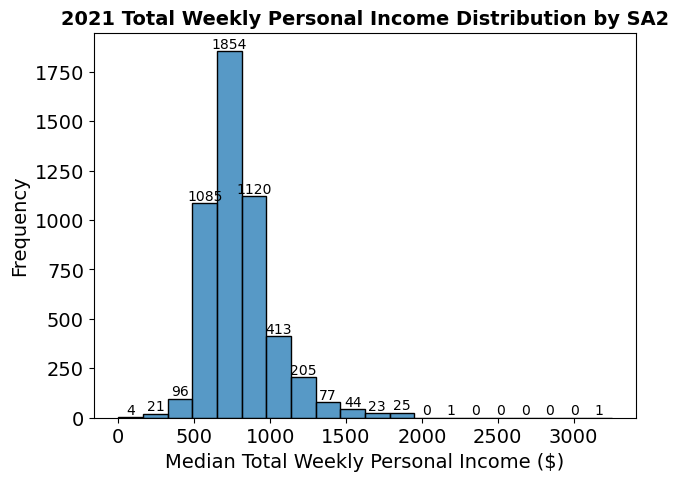

In [13]:
personal_income_data = merged_external_df['Median_tot_prsnl_inc_weekly']

# create the plot
plt.figure(figsize=(7, 5))
ax = sns.histplot(personal_income_data, bins=20, kde=False)

plt.title('2021 Total Weekly Personal Income Distribution by SA2', weight='bold', fontsize=14)
plt.xlabel('Median Total Weekly Personal Income ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# add labels to each bar
for patch in ax.patches:
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# save and display the plot
plt.savefig('../plots/personal_income_hist.png', dpi=300, bbox_inches='tight')
plt.show()

### Weekly rent distribution by SA2

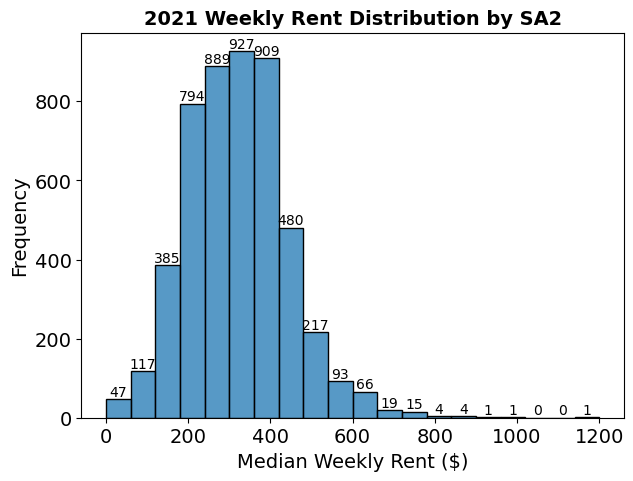

In [14]:
rent_data = merged_external_df['Median_rent_weekly']

# create the plot
plt.figure(figsize=(7, 5))
ax = sns.histplot(rent_data, bins=20, kde=False)

plt.title('2021 Weekly Rent Distribution by SA2', weight='bold', fontsize=14)
plt.xlabel('Median Weekly Rent ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# add labels to each bar
for patch in ax.patches:
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# save and display the plot
plt.savefig('../plots/rent_hist.png', dpi=300, bbox_inches='tight')
plt.show()

### Total family weekly income by SA2

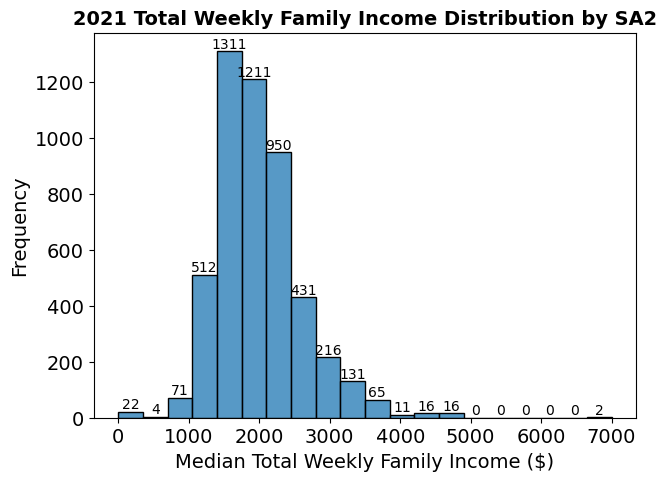

In [15]:
family_income_data = merged_external_df['Median_tot_fam_inc_weekly']

# create the plot
plt.figure(figsize=(7, 5))
ax = sns.histplot(family_income_data, bins=20, kde=False)

plt.title('2021 Total Weekly Family Income Distribution by SA2', weight='bold', fontsize=14)
plt.xlabel('Median Total Weekly Family Income ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# add labels to each bar
for patch in ax.patches:
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# save and display the plot
plt.savefig('../plots/family_income_hist.png', dpi=300, bbox_inches='tight')
plt.show()

### Number of persons per bedroom distribution by SA2

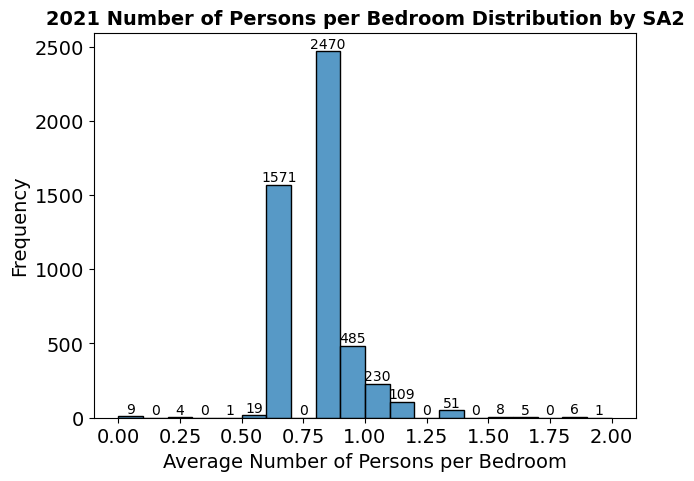

In [16]:
num_psns_per_bedroom_data = merged_external_df['Average_num_psns_per_bedroom']

# create the plot
plt.figure(figsize=(7, 5))
ax = sns.histplot(num_psns_per_bedroom_data, bins=20, kde=False)

plt.title('2021 Number of Persons per Bedroom Distribution by SA2', weight='bold', fontsize=14)
plt.xlabel('Average Number of Persons per Bedroom', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# add labels to each bar
for patch in ax.patches:
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# save and display the plot
plt.savefig('../plots/num_persons_per_bedroom_hist.png', dpi=300, bbox_inches='tight')
plt.show()

### Total household weekly income by SA2

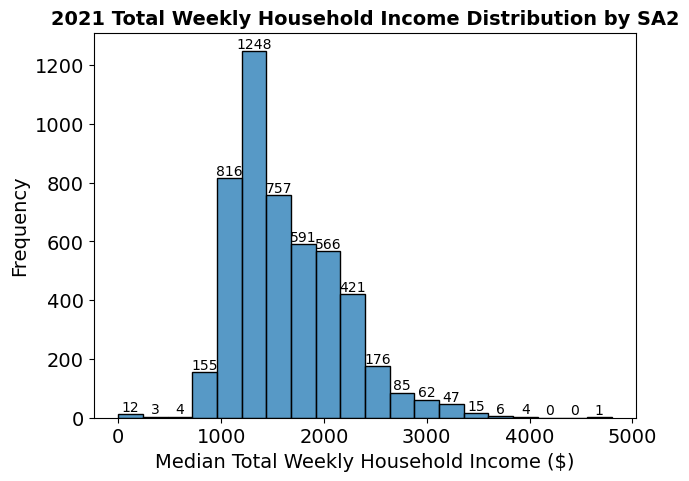

In [17]:
household_income_data = merged_external_df['Median_tot_hhd_inc_weekly']

# create the plot
plt.figure(figsize=(7, 5))
ax = sns.histplot(household_income_data, bins=20, kde=False)

plt.title('2021 Total Weekly Household Income Distribution by SA2', weight='bold', fontsize=14)
plt.xlabel('Median Total Weekly Household Income ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# add labels to each bar
for patch in ax.patches:
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# save and display the plot
plt.savefig('../plots/household_income_hist.png', dpi=300, bbox_inches='tight')
plt.show()

### Household size distribution by SA2

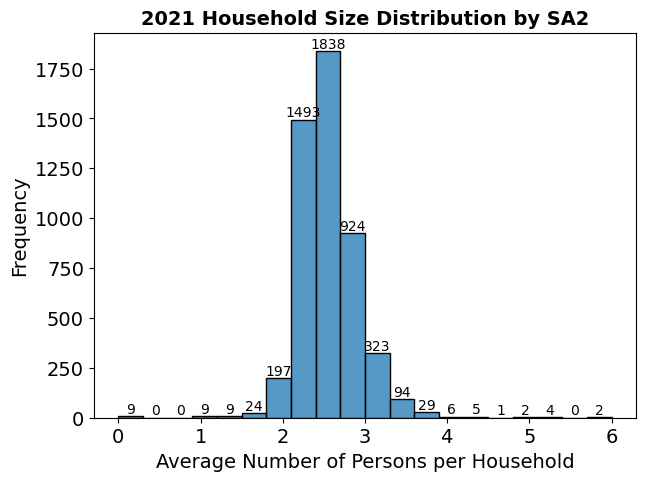

In [18]:
household_size_data = merged_external_df['Average_household_size']

# create the plot
plt.figure(figsize=(7, 5))
ax = sns.histplot(household_size_data, bins=20, kde=False)

plt.title('2021 Household Size Distribution by SA2', weight='bold', fontsize=14)
plt.xlabel('Average Number of Persons per Household', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# add labels to each bar
for patch in ax.patches:
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# save and display the plot
plt.savefig('../plots/household_size_hist.png', dpi=300, bbox_inches='tight')
plt.show()

### Unemployment rate distribution by SA2

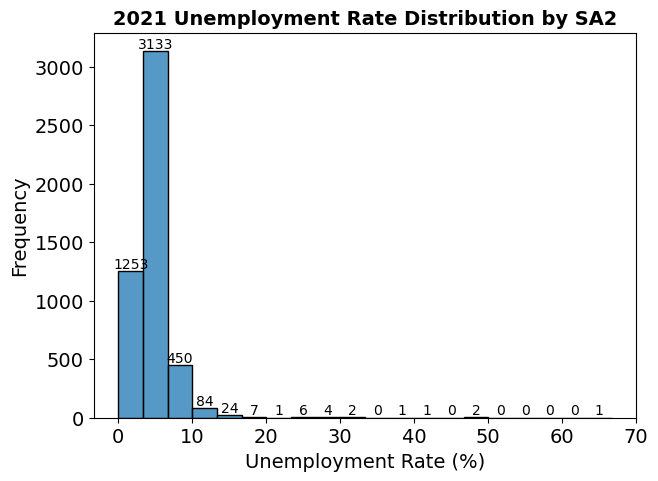

In [19]:
unemp_data = merged_external_df['unemployment_rate']

# create the plot
plt.figure(figsize=(7, 5))
ax = sns.histplot(unemp_data, bins=20, kde=False)

plt.title('2021 Unemployment Rate Distribution by SA2', weight='bold', fontsize=14)
plt.xlabel('Unemployment Rate (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# add labels to each bar
for patch in ax.patches:
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# save and display the plot
plt.savefig('../plots/unemployment_rate_hist.png', dpi=300, bbox_inches='tight')
plt.show()

# Maps

In [13]:
geoJSON = merged_external_gdf[['SA2_name', 'geometry']].drop_duplicates('SA2_name').to_json()

### Population distribution by SA2

In [ ]:
# select the top 5 SA2 name based on average population
top5_population = merged_external_gdf.nlargest(5, 'average_population')
top5_population

,SA2_name,average_population,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,geometry,postcode,state,unemployment_rate
2056,Tarneit - Central,28645.5,30,1900,830,380,2127,0.9,2164,3.5,"POLYGON ((144.65232 -37.83945, 144.65237 -37.8...",3029,VIC,7.2
841,Schofields - East,27520.5,31,2817,1166,550,2793,0.9,2682,3.2,"POLYGON ((150.87205 -33.6896, 150.87232 -33.68...",2762,NSW,4.7
4220,Baldivis - South,27385.5,32,1915,938,370,2337,0.8,2161,3.0,"POLYGON ((115.79037 -32.3306, 115.79105 -32.32...",6171,WA,5.0
1947,Pakenham - South West,27302.5,33,1800,788,369,1959,0.8,1803,3.0,"POLYGON ((145.43721 -38.0642, 145.43739 -38.06...",3810,VIC,5.2
1612,Wonthaggi - Inverloch,27137.0,51,1467,618,298,1480,0.7,1154,2.2,"POLYGON ((145.4229 -38.41215, 145.42268 -38.41...",3925,VIC,4.0


In [ ]:
# create the map
population_map = folium.Map(location=[-25.2744, 133.7751], zoom_start=4)

folium.Choropleth(
    geo_data=geoJSON,
    name='choropleth',
    data=merged_external_gdf[['SA2_name', 'average_population', 'geometry']],
    columns=['SA2_name', 'average_population'],
    key_on='feature.properties.SA2_name',
    bins=7,
    fill_color='RdPu',
    nan_fill_color='gray',
    legend_name='2021 Average Population Distribution by SA2'
).add_to(population_map)

# mark the area of top 5 population
top5_population['centroid'] = top5_population['geometry'].centroid

for _, row in top5_population.iterrows():
    lat, lon = row['centroid'].y, row['centroid'].x
    
    folium.Marker(
        location=[lat, lon],
        popup=f"{row['SA2_name']} Population: {row['average_population']}",
    ).add_to(population_map)

# save the map
population_map.save('../plots/population_map.html')

/var/folders/rc/ddmw432j4cj3k9y_h6wn3npw0000gn/T/ipykernel_8948/141613132.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  top5_population['centroid'] = top5_population['geometry'].centroid


### Age distribution by SA2

In [55]:
# select the top 5 SA2 name based on average population
top5_age= merged_external_gdf.nlargest(5, 'Median_age_persons')
top5_age

,SA2_name,average_population,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,geometry,postcode,state,unemployment_rate
2890,New Chum,3.0,91,0,225,0,0,0.0,0,0.0,"POLYGON ((152.83272 -27.60208, 152.83416 -27.6...",4303,QLD,0.0
4044,Walyunga National Park,0.0,84,0,450,0,0,1.0,450,1.0,"POLYGON ((116.05628 -31.70816, 116.07026 -31.7...",6084,WA,0.0
4904,Parkes (ACT) - South,4.0,82,0,824,178,0,1.0,1375,2.0,"POLYGON ((149.12554 -35.3008, 149.12598 -35.29...",2600,ACT,0.0
1100,Blue Mountains - South,7.0,70,0,900,150,0,0.7,900,1.0,"POLYGON ((150.17345 -33.81724, 150.1734 -33.81...",2787,NSW,0.0
1101,Blue Mountains - South,7.0,70,0,900,150,0,0.7,900,1.0,"POLYGON ((150.17345 -33.81724, 150.1734 -33.81...",2787,NSW,0.0


In [56]:
# create the map
age_map = folium.Map(location=[-25.2744, 133.7751], zoom_start=4)

folium.Choropleth(
    geo_data=geoJSON,
    name='choropleth',
    data=merged_external_gdf[['SA2_name', 'Median_age_persons', 'geometry']],
    columns=['SA2_name', 'Median_age_persons'],
    key_on='feature.properties.SA2_name',
    bins=9,
    fill_color='RdPu',
    nan_fill_color='gray',
    legend_name='2021 Median Age Distribution by SA2'
).add_to(age_map)

# mark the area of top 5 population
top5_age['centroid'] = top5_age['geometry'].centroid

for _, row in top5_age.iterrows():
    lat, lon = row['centroid'].y, row['centroid'].x
    
    folium.Marker(
        location=[lat, lon],
        popup=f"{row['SA2_name']} Age: {row['Median_age_persons']}",
    ).add_to(age_map)

# save the map
age_map.save('../plots/age_map.html')

/var/folders/rc/ddmw432j4cj3k9y_h6wn3npw0000gn/T/ipykernel_8948/3222706670.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  top5_age['centroid'] = top5_age['geometry'].centroid


### Monthly mortgage repayment distribution by SA2

In [14]:
# select the top 5 SA2 name based on median mortgage repayment
top5_mortgage = merged_external_gdf.nlargest(5, 'Median_mortgage_repay_monthly')
top5_mortgage

,SA2_name,average_population,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,geometry,postcode,state,unemployment_rate
3983,Kings Park (WA),50.0,61,9999,2150,1000,4874,0.8,4799,2.2,"POLYGON ((115.83968 -31.96616, 115.83964 -31.9...",6005,WA,0.0
2580,Wooroonooran,3.0,60,5200,1125,0,2250,0.5,2250,1.5,"POLYGON ((145.79548 -17.30782, 145.79553 -17.3...",4860,QLD,0.0
2967,Eungella Hinterland,9.0,61,4800,1625,430,3250,0.7,2624,1.8,"POLYGON ((148.44802 -21.28473, 148.44622 -21.2...",4741,QLD,0.0
2968,Eungella Hinterland,9.0,61,4800,1625,430,3250,0.7,2624,1.8,"POLYGON ((148.44802 -21.28473, 148.44622 -21.2...",4757,QLD,0.0
987,Castle Cove - Northbridge,13403.0,45,4333,1355,850,4641,0.8,3987,2.9,"POLYGON ((151.21145 -33.80199, 151.21134 -33.8...",2063,NSW,3.9


In [17]:
# create the map
mortgage_map = folium.Map(location=[-25.2744, 133.7751], zoom_start=4)

folium.Choropleth(
    geo_data=geoJSON,
    name='choropleth',
    data=merged_external_gdf[['SA2_name', 'Median_mortgage_repay_monthly', 'geometry']],
    columns=['SA2_name', 'Median_mortgage_repay_monthly'],
    key_on='feature.properties.SA2_name',
    bins=9,
    fill_color='RdPu',
    nan_fill_color='gray',
    legend_name='2021 Median Monthly Mortgage Repayment Distribution by SA2'
).add_to(mortgage_map)

# mark the area of top 5 population
top5_mortgage['centroid'] = top5_mortgage['geometry'].centroid

for _, row in top5_mortgage.iterrows():
    lat, lon = row['centroid'].y, row['centroid'].x
    
    folium.Marker(
        location=[lat, lon],
        popup=f"{row['SA2_name']} Mortgage: {row['Median_mortgage_repay_monthly']}",
    ).add_to(mortgage_map)

# save the map
mortgage_map.save('../plots/mortgage_map.html')

/var/folders/rc/ddmw432j4cj3k9y_h6wn3npw0000gn/T/ipykernel_12063/2810163339.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  top5_mortgage['centroid'] = top5_mortgage['geometry'].centroid


### Total personal weekly income distribution by SA2

In [61]:
# select the top 5 SA2 name based on median mortgage repayment
top5_personal_income = merged_external_gdf.nlargest(5, 'Median_tot_prsnl_inc_weekly')
top5_personal_income

,SA2_name,average_population,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,geometry,postcode,state,unemployment_rate
3576,Adelaide Airport,3.0,51,0,3250,0,0,0.0,0,0.0,"POLYGON ((138.5475 -34.93819, 138.54757 -34.93...",5950,SA,0.0
3983,Kings Park (WA),50.0,61,9999,2150,1000,4874,0.8,4799,2.2,"POLYGON ((115.83968 -31.96616, 115.83964 -31.9...",6005,WA,0.0
4420,Ashburton (WA),7807.5,34,1613,1865,48,3310,0.9,2937,2.7,"MULTIPOLYGON (((115.33915 -20.96123, 115.33913...",6710,WA,2.0
4421,Ashburton (WA),7807.5,34,1613,1865,48,3310,0.9,2937,2.7,"MULTIPOLYGON (((115.33915 -20.96123, 115.33913...",6711,WA,2.0
4422,Ashburton (WA),7807.5,34,1613,1865,48,3310,0.9,2937,2.7,"MULTIPOLYGON (((115.33915 -20.96123, 115.33913...",6712,WA,2.0


In [63]:
# create the map
personal_income_map = folium.Map(location=[-25.2744, 133.7751], zoom_start=4)

folium.Choropleth(
    geo_data=geoJSON,
    name='choropleth',
    data=merged_external_gdf[['SA2_name', 'Median_tot_prsnl_inc_weekly', 'geometry']],
    columns=['SA2_name', 'Median_tot_prsnl_inc_weekly'],
    key_on='feature.properties.SA2_name',
    bins=9,
    fill_color='RdPu',
    nan_fill_color='gray',
    legend_name='2021 Median Total Weekly Personal Income Distribution by SA2'
).add_to(personal_income_map)

# mark the area of top 5 income
top5_personal_income['centroid'] = top5_personal_income['geometry'].centroid

for _, row in top5_personal_income.iterrows():
    lat, lon = row['centroid'].y, row['centroid'].x
    
    folium.Marker(
        location=[lat, lon],
        popup=f"{row['SA2_name']} Total Weekly Personal Income: {row['Median_tot_prsnl_inc_weekly']}",
    ).add_to(personal_income_map)

# save the map
personal_income_map.save('../plots/personal_income_map.html')

/var/folders/rc/ddmw432j4cj3k9y_h6wn3npw0000gn/T/ipykernel_8948/1355807449.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  top5_personal_income['centroid'] = top5_personal_income['geometry'].centroid


### Total weekly household income distribution by SA2

In [64]:
# select the top 5 SA2 name based on weekly total personal income
top5_household_income = merged_external_gdf.nlargest(5, 'Median_tot_hhd_inc_weekly')
top5_household_income

,SA2_name,average_population,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,geometry,postcode,state,unemployment_rate
3983,Kings Park (WA),50.0,61,9999,2150,1000,4874,0.8,4799,2.2,"POLYGON ((115.83968 -31.96616, 115.83964 -31.9...",6005,WA,0.0
987,Castle Cove - Northbridge,13403.0,45,4333,1355,850,4641,0.8,3987,2.9,"POLYGON ((151.21145 -33.80199, 151.21134 -33.8...",2063,NSW,3.9
988,Castle Cove - Northbridge,13403.0,45,4333,1355,850,4641,0.8,3987,2.9,"POLYGON ((151.21145 -33.80199, 151.21134 -33.8...",2068,NSW,3.9
989,Castle Cove - Northbridge,13403.0,45,4333,1355,850,4641,0.8,3987,2.9,"POLYGON ((151.21145 -33.80199, 151.21134 -33.8...",2069,NSW,3.9
4905,Red Hill (ACT),3173.5,42,3500,1469,500,4667,0.8,3938,2.8,"POLYGON ((149.1161 -35.33688, 149.11656 -35.33...",2603,ACT,3.4


In [65]:
# create the map
household_income_map = folium.Map(location=[-25.2744, 133.7751], zoom_start=4)

folium.Choropleth(
    geo_data=geoJSON,
    name='choropleth',
    data=merged_external_gdf[['SA2_name', 'Median_tot_hhd_inc_weekly', 'geometry']],
    columns=['SA2_name', 'Median_tot_hhd_inc_weekly'],
    key_on='feature.properties.SA2_name',
    bins=9,
    fill_color='RdPu',
    nan_fill_color='gray',
    legend_name='2021 Median Total Weekly Household Income Distribution by SA2'
).add_to(household_income_map)

# mark the area of top 5 income
top5_household_income['centroid'] = top5_household_income['geometry'].centroid

for _, row in top5_household_income.iterrows():
    lat, lon = row['centroid'].y, row['centroid'].x
    
    folium.Marker(
        location=[lat, lon],
        popup=f"{row['SA2_name']} Total Weekly Household Income: {row['Median_tot_hhd_inc_weekly']}",
    ).add_to(household_income_map)

# save the map
household_income_map.save('../plots/household_income_map.html')

/var/folders/rc/ddmw432j4cj3k9y_h6wn3npw0000gn/T/ipykernel_8948/3042843500.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  top5_household_income['centroid'] = top5_household_income['geometry'].centroid


### Weekly rent distribution by SA2

In [66]:
# select the top 5 SA2 name based on weekly rent
top5_rent = merged_external_gdf.nlargest(5, 'Median_rent_weekly')
top5_rent

,SA2_name,average_population,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,geometry,postcode,state,unemployment_rate
858,Port Botany Industrial,9.0,61,3179,1812,1200,3749,0.9,2499,1.8,"POLYGON ((151.22091 -33.96895, 151.22066 -33.9...",2036,NSW,0.0
3983,Kings Park (WA),50.0,61,9999,2150,1000,4874,0.8,4799,2.2,"POLYGON ((115.83968 -31.96616, 115.83964 -31.9...",6005,WA,0.0
4109,Ashendon - Lesley,3.0,46,0,0,927,0,0.2,0,1.0,"POLYGON ((116.15935 -32.13593, 116.1593 -32.12...",6111,WA,0.0
1047,Belrose,8652.5,46,3464,903,885,3121,0.8,2601,2.9,"POLYGON ((151.19192 -33.73102, 151.19065 -33.7...",2085,NSW,2.9
987,Castle Cove - Northbridge,13403.0,45,4333,1355,850,4641,0.8,3987,2.9,"POLYGON ((151.21145 -33.80199, 151.21134 -33.8...",2063,NSW,3.9


In [67]:
# create the map
rent_map = folium.Map(location=[-25.2744, 133.7751], zoom_start=4)

folium.Choropleth(
    geo_data=geoJSON,
    name='choropleth',
    data=merged_external_gdf[['SA2_name', 'Median_rent_weekly', 'geometry']],
    columns=['SA2_name', 'Median_rent_weekly'],
    key_on='feature.properties.SA2_name',
    bins=9,
    fill_color='RdPu',
    nan_fill_color='gray',
    legend_name='2021 Median Total Weekly Rent Distribution by SA2'
).add_to(rent_map)

# mark the area of top 5 income
top5_rent['centroid'] = top5_rent['geometry'].centroid

for _, row in top5_rent.iterrows():
    lat, lon = row['centroid'].y, row['centroid'].x
    
    folium.Marker(
        location=[lat, lon],
        popup=f"{row['SA2_name']} Total Weekly Rent: {row['Median_rent_weekly']}",
    ).add_to(rent_map)

# save the map
rent_map.save('../plots/rent_map.html')

/var/folders/rc/ddmw432j4cj3k9y_h6wn3npw0000gn/T/ipykernel_8948/2173178399.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  top5_rent['centroid'] = top5_rent['geometry'].centroid


### Unemployment rate distribution by SA2

In [50]:
# select the top 5 SA2 name based on unemployment rate
top5_unemp = merged_external_gdf.nlargest(5, 'unemployment_rate')
top5_unemp

,SA2_name,average_population,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,geometry,postcode,state,unemployment_rate
4954,Whitlam,30.5,27,2750,75,0,900,1.5,900,6.0,"POLYGON ((149.05114 -35.26921, 149.05092 -35.2...",2611,ACT,66.7
2887,Carole Park,7.0,36,0,1062,150,2250,0.6,2250,2.0,"POLYGON ((152.91544 -27.61917, 152.91593 -27.6...",4300,QLD,50.0
3443,Parafield,18.0,22,0,274,0,0,0.0,0,0.0,"POLYGON ((138.61917 -34.79599, 138.61976 -34.7...",5106,SA,50.0
3062,Kowanyama - Pormpuraaw,1756.5,30,0,345,118,902,1.3,1104,3.6,"MULTIPOLYGON (((141.591 -15.19652, 141.59143 -...",4892,QLD,42.0
2581,Yarrabah,2608.0,25,1392,337,150,911,1.5,1254,4.5,"MULTIPOLYGON (((145.90107 -16.99399, 145.90083...",4871,QLD,37.2


In [51]:
# create the map
unemp_map = folium.Map(location=[-25.2744, 133.7751], zoom_start=4)

folium.Choropleth(
    geo_data=geoJSON,
    name='choropleth',
    data=merged_external_gdf,
    columns=['SA2_name', 'unemployment_rate'],
    key_on='feature.properties.SA2_name',
    bins=9,
    fill_color='RdPu',
    nan_fill_color='gray',
    legend_name='2021 Unemployment Rate Distribution by SA2'
).add_to(unemp_map)

# mark the area of top 5 unemployment rate
top5_unemp['centroid'] = top5_unemp['geometry'].centroid

for _, row in top5_unemp.iterrows():
    lat, lon = row['centroid'].y, row['centroid'].x
    
    folium.Marker(
        location=[lat, lon],
        popup=f"{row['SA2_name']} Unemployment Rate: {row['unemployment_rate']}",
    ).add_to(unemp_map)

# save the plot
unemp_map.save('../plots/unemployment_rate_map.html')

/var/folders/rc/ddmw432j4cj3k9y_h6wn3npw0000gn/T/ipykernel_8948/527060310.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  top5_unemp['centroid'] = top5_unemp['geometry'].centroid
